# Movie Analytics

## Import All modules

In [5]:
# Import modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

## Display Data

### Import Dataframe

In [6]:
dataframe = pd.read_csv('movies_metadata.csv')

In [7]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45463 entries, 0 to 45462
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   adult                  45463 non-null  bool   
 1   belongs_to_collection  4491 non-null   object 
 2   budget                 45463 non-null  int64  
 3   genres                 45463 non-null  object 
 4   homepage               7779 non-null   object 
 5   id                     45463 non-null  int64  
 6   imdb_id                45446 non-null  object 
 7   original_language      45452 non-null  object 
 8   original_title         45463 non-null  object 
 9   overview               44509 non-null  object 
 10  popularity             45460 non-null  float64
 11  poster_path            45077 non-null  object 
 12  production_companies   45460 non-null  object 
 13  production_countries   45460 non-null  object 
 14  release_date           45376 non-null  object 
 15  re

#### Get a sample data

In [8]:
# Take a sample of the data
dataframe.sample(10)

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
33830,True,NaN,0,"[{'id': 99, 'name': 'Documentary'}]",https://www.facebook.com/towerrecordsdoc,324253,tt3272570,en,All Things Must Pass,"Established in 1960, Tower Records was once a ...",2.792944,/5JYu2MZaKHVHGQDo8uKo2oB0McO.jpg,"[{'name': 'Company Name', 'id': 48269}]","[{'iso_3166_1': 'JP', 'name': 'Japan'}, {'iso_...",2015-10-16,0.0,94.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The rise and fall of Tower Records,All Things Must Pass,False,7.0,33.0
4828,True,"{'id': 98513, 'name': 'Behind Enemy Lines Coll...",40000000,"[{'id': 28, 'name': 'Action'}, {'id': 18, 'nam...",NaN,8007,tt0159273,en,Behind Enemy Lines,While flying a routine reconnaissance mission ...,11.185625,/dl1OgKeKxKQsOAqGM7TZRNozbKf.jpg,[{'name': 'Twentieth Century Fox Film Corporat...,"[{'iso_3166_1': 'US', 'name': 'United States o...",2001-11-17,91753202.0,106.0,"[{'iso_639_1': 'cs', 'name': 'Český'}, {'iso_6...",Released,His only weapon is his will to survive.,Behind Enemy Lines,False,6.0,464.0
14920,True,NaN,0,"[{'id': 18, 'name': 'Drama'}, {'id': 80, 'name...",NaN,85521,tt0056952,en,The Cool World,"Filmmaker Shirley Clarke (""The Connection"") di...",0.693882,/2TVAXl7PlZJZELFaQ7YEffwlWku.jpg,"[{'name': 'Wiseman Film Productions', 'id': 40...","[{'iso_3166_1': 'US', 'name': 'United States o...",1963-01-01,0.0,105.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,The Cool World,False,4.3,3.0
18558,True,NaN,0,[],NaN,112485,tt0006826,en,Hoodoo Ann,A teenage orphan (Mae Marsh) is taken in by a ...,0.189059,/rSO91EltyRJC0JV7ruRhmVaue6O.jpg,[],[],1916-03-26,0.0,65.0,[],Released,NaN,Hoodoo Ann,False,5.3,3.0
38475,True,NaN,0,"[{'id': 99, 'name': 'Documentary'}]",NaN,54316,tt0062379,en,Tonite Let's All Make Love in London,Peter Whitehead’s disjointed Swinging London d...,0.382074,/hBktLK9yRHSEfW5bEulM2OEmf2v.jpg,"[{'name': 'Lorrimer Films', 'id': 40071}]","[{'iso_3166_1': 'GB', 'name': 'United Kingdom'}]",1967-09-26,0.0,70.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Swinging London 66-67,Tonite Let's All Make Love in London,False,3.8,2.0
27820,True,NaN,0,"[{'id': 35, 'name': 'Comedy'}]",NaN,309298,tt3534282,en,Don Verdean,Biblical archaeologist Don Verdean is hired by...,2.789838,/zpAffTJHPVncd1rV4tUHYImYOQ3.jpg,"[{'name': 'Lions Gate Films', 'id': 35}]","[{'iso_3166_1': 'US', 'name': 'United States o...",2015-12-01,31309.0,96.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Fraud works in mysterious ways.,Don Verdean,False,4.1,44.0
14359,True,"{'id': 656, 'name': 'Saw Collection', 'poster_...",11000000,"[{'id': 27, 'name': 'Horror'}, {'id': 9648, 'n...",http://www.saw6film.com/,22804,tt1233227,en,Saw VI,"Special Agent Strahm is dead, and Detective Ho...",17.360894,/iCVk1uniEoQLXdluUGUXBaAgD1H.jpg,"[{'name': 'Lionsgate', 'id': 1632}, {'name': '...","[{'iso_3166_1': 'AU', 'name': 'Australia'}, {'...",2009-10-22,68233629.0,90.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The Game Has Come Full Circle,Saw VI,False,6.0,755.0
30946,True,NaN,0,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,202980,tt2197088,fr,Les Petits princes,NaN,2.830540,/eg8r1dHNfc9xlIHwhX2vAZe1zc2.jpg,"[{'name': 'EuropaCorp', 'id': 6896}, {'name': ...","[{'iso_3166_1': 'FR', 'name': 'France'}]",2013-06-26,0.0,0.0,"[{'iso_639_1': 'fr', 'name': 'Français'}]",Released,NaN,Les Petits princes,False,6.8,57.0
12782,True,NaN,0,"[{'id': 18, 'name': 'Drama'}]",NaN,10190,tt0787523,en,Towelhead,A young Arab-American girl struggles with her ...,3.376907,/c0A6zaSbMNbN2eXnMWzx5baQbOt.jpg,"[{'name': 'This Is That Productions', 'id': 10...","[{'iso_3166_1': 'US', 'name': 'United States o...",2008-09-12,367638.0,111.0,"[{'iso_639_1': 'ar', 'name': 'العربية'}, {'iso...",Released,How can you find yourself 

In [9]:
dataframe.index

RangeIndex(start=0, stop=45463, step=1)

In [10]:
# Set index as movie titles
dataframe.set_index('title', inplace=True)

In [11]:
dataframe

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,video,vote_average,vote_count
title,,,,,,,,,,,,,,,,,,,,,,,
Toy Story,True,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",21.946943,/rhIRbceoE9lR4veEXuwCC2wARtG.jpg,"[{'name': 'Pixar Animation Studios', 'id': 3}]","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,False,7.7,5415.0
Jumanji,True,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,17.015539,/vzmL6fP7aPKNKPRTFnZmiUfciyV.jpg,"[{'name': 'TriStar Pictures', 'id': 559}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,False,6.9,2413.0
Grumpier Old Men,True,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,11.712900,/6ksm1sjKMFLbO7UY2i6G1ju9SML.jpg,"[{'name': 'Warner Bros.', 'id': 6194}, {'name'...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,False,6.5,92.0
Waiting to Exhale,True,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",3.859495,/16XOMpEaLWkrcPqSQqhTmeJuqQl.jpg,[{'name': 'Twentieth Century Fox Film Corporat...,"[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,False,6.1,34.0
Father of the Bride Part II,True,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,8.387519,/e64sOI48hQXyru7naBFyssKFxVd.jpg,"[{'name': 'Sandollar Productions', 'id': 5842}...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,False,5.7,173.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Subdue,True,NaN,0,"[{'id': 18, 'name': 'Drama'}, {'id': 10751, 'n...",http://www.imdb.com/title/tt6209470/,439050,tt6209470,fa,رگ خواب,Rising and falling between a man and woman.,0.072051,/jldsYflnId4tTWPx8es3uzsB1I8.jpg,[],"[{'iso_3166_1': 'IR', 'name': 'Iran'}]",NaN,0.0,90.0,"[{'iso_639_1': 'fa', 'name': 'فارسی'}]",Released,Rising and falling between a man and woman,False,4.0,1.0
Century of Birthing,True,NaN,0,"[{'id': 18, 'name': 'Drama'}]",NaN,111109,tt2028550,tl,Siglo ng Pagluluwal,An artist struggles to finish his work while a...,0.178241,/xZkmxsNmYXJbKVsTRLLx3pqGHx7.jpg,"[{'name': 'Sine Olivia', 'id': 19653}]","[{'iso_3166_1': 'PH', 'name': 'Philippines'}]",2011-11-17,0.0,360.0,"[{'iso_639_1': 'tl', 'name': ''}]",Released,NaN,False,9.0,3.0
Betrayal,True,NaN,0,"[{'id': 28, 'name': 'Action'}, {'id': 18, 'nam...",NaN,67758,tt0303758,en,Betrayal,"When one of her hits goes wrong, a professiona...",0.903007,/d5bX92nDsISNhu3ZT69uHwmfCGw.jpg,"[{'name': 'American World Pictures', 'id': 6165}]","[{'iso_3166_1': 'US', 'name': 'United States o...",2003-08-01,0.0,90.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,A deadly game of wits.,False,3.8,6.0


In [12]:
# Get the dataframe
dataframe.loc['Tom and Huck']

adult                                                                 True
belongs_to_collection                                                  NaN
budget                                                                   0
genres                   [{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...
homepage                                                               NaN
id                                                                   45325
imdb_id                                                          tt0112302
original_language                                                       en
original_title                                                Tom and Huck
overview                 A mischievous young boy, Tom Sawyer, witnesses...
popularity                                                        2.561161
poster_path                               /sGO5Qa55p7wTu7FJcX4H4xIVKvS.jpg
production_companies           [{'name': 'Walt Disney Pictures', 'id': 2}]
production_countries     

In [13]:
# Reset the index
dataframe.reset_index(inplace=True)
dataframe

,title,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,video,vote_average,vote_count
0,Toy Story,True,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",21.946943,/rhIRbceoE9lR4veEXuwCC2wARtG.jpg,"[{'name': 'Pixar Animation Studios', 'id': 3}]","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,False,7.7,5415.0
1,Jumanji,True,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,17.015539,/vzmL6fP7aPKNKPRTFnZmiUfciyV.jpg,"[{'name': 'TriStar Pictures', 'id': 559}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,False,6.9,2413.0
2,Grumpier Old Men,True,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,11.712900,/6ksm1sjKMFLbO7UY2i6G1ju9SML.jpg,"[{'name': 'Warner Bros.', 'id': 6194}, {'name'...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,False,6.5,92.0
3,Waiting to Exhale,True,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",3.859495,/16XOMpEaLWkrcPqSQqhTmeJuqQl.jpg,[{'name': 'Twentieth Century Fox Film Corporat...,"[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,False,6.1,34.0
4,Father of the Bride Part II,True,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,8.387519,/e64sOI48hQXyru7naBFyssKFxVd.jpg,"[{'name': 'Sandollar Productions', 'id': 5842}...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,False,5.7,173.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45458,Subdue,True,NaN,0,"[{'id': 18, 'name': 'Drama'}, {'id': 10751, 'n...",http://www.imdb.com/title/tt6209470/,439050,tt6209470,fa,رگ خواب,Rising and falling between a man and woman.,0.072051,/jldsYflnId4tTWPx8es3uzsB1I8.jpg,[],"[{'iso_3166_1': 'IR', 'name': 'Iran'}]",NaN,0.0,90.0,"[{'iso_639_1': 'fa', 'name': 'فارسی'}]",Released,Rising and falling between a man and woman,False,4.0,1.0
45459,Century of Birthing,True,NaN,0,"[{'id': 18, 'name': 'Drama'}]",NaN,111109,tt2028550,tl,Siglo ng Pagluluwal,An artist struggles to finish his work while a...,0.178241,/xZkmxsNmYXJbKVsTRLLx3pqGHx7.jpg,"[{'name': 'Sine Olivia', 'id': 19653}]","[{'iso_3166_1': 'PH', 'name': 'Philippines'}]",2011-11-17,0.0,360.0,"[{'iso_639_1': 'tl', 'name': ''}]",Released,NaN,False,9.0,3.0
45460,Betrayal,True,NaN,0,"[{'id': 28, 'name': 'Action'}, {'id': 18, 'nam...",NaN,67758,tt0303758,en,Betrayal,"When one of her hits goes wrong, a professiona...",0.903007,/d5bX92nDsISNhu3ZT69uHwmfCGw.jpg,"[{'name': 'American World Pictures', 'id': 6165}]","[{'iso_3166_1': 'US', 'name': 'United States o...",2003-08-01,0.0,90.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,A deadly game of wits.,False,3.8,6.0
45461,Sa

### Generate the index

In [14]:
dataframe1 = dataframe.head()

#### Get profit chart

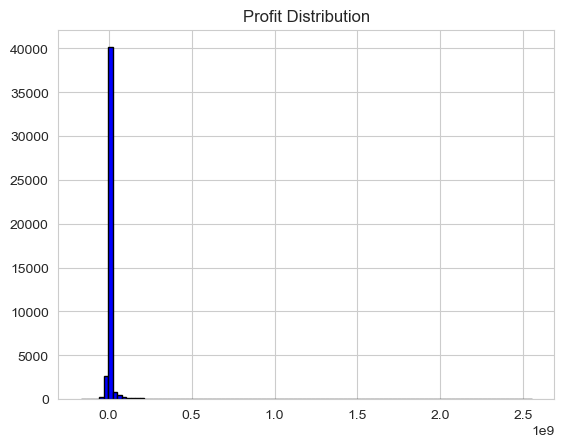

In [15]:
# Now, we check profit column in dataframe
dataframe['profit'] = dataframe['revenue'] - dataframe['budget']

# Set the style using seaborn
sns.set_style('whitegrid')

# Plotting the profit distribution
dataframe['profit'].hist(bins=100, color='blue', edgecolor='black')
plt.title("Profit Distribution")
plt.show()

In [16]:
# Now we describe the profit column

dataframe["profit"].describe()

count    4.546000e+04
mean     6.984491e+06
std      5.214125e+07
min     -1.657101e+08
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      2.550965e+09
Name: profit, dtype: float64

### Display the data using boxplot seaborn

<Axes: >

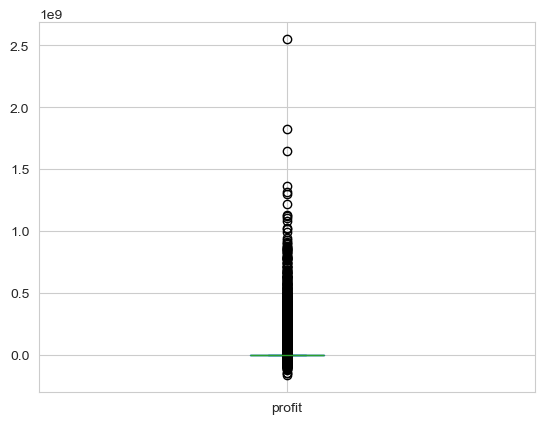

In [17]:
dataframe["profit"].plot(kind = "box")

### Display Profitable Movies

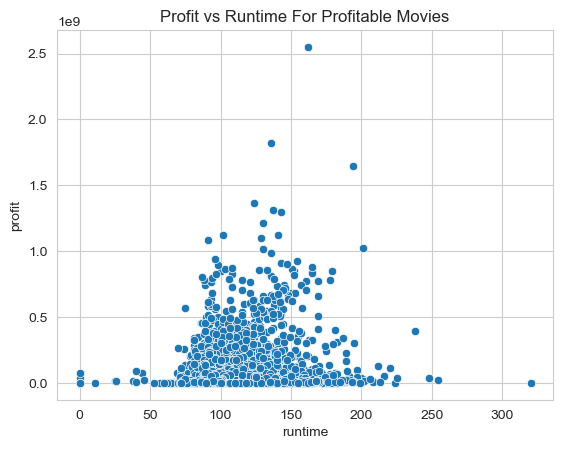

In [18]:
# Check for profitable movies
profitable_movies = dataframe[dataframe['profit'] > 0]
sns.scatterplot(data=profitable_movies, 
                x = 'runtime',
                y = 'profit')
plt.title("Profit vs Runtime For Profitable Movies")
plt.show()

### Show Movies Rating

In [19]:
# Now, we load the ratings data
rating = pd.read_csv('ratings_small.csv')
rating.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100004 entries, 0 to 100003
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     100004 non-null  int64  
 1   movieId    100004 non-null  int64  
 2   rating     100004 non-null  float64
 3   timestamp  100004 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 3.1 MB


<Axes: xlabel='rating', ylabel='Count'>

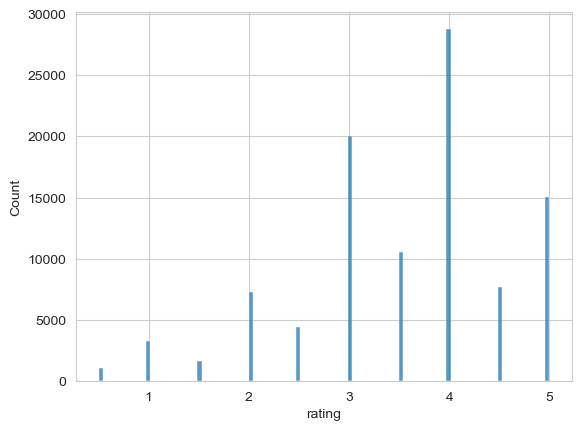

In [20]:
# Make histplot of rating values using seaborn
sns.histplot(data = rating, x = 'rating') 

# Data Science Preparation

## Change Data Type

### Change Data Type

In [21]:
# Now we wat to change release dato from object to datetime
# First, we need to check the format of the date
dataframe['release_date']

0        1995-10-30
1        1995-12-15
2        1995-12-22
3        1995-12-22
4        1995-02-10
            ...    
45458           NaN
45459    2011-11-17
45460    2003-08-01
45461    1917-10-21
45462    2017-06-09
Name: release_date, Length: 45463, dtype: object

In [22]:
# Change the data type
dataframe['release_date'] = pd.to_datetime(dataframe['release_date'])
dataframe['release_date'].dtypes
dataframe.dtypes

title                            object
adult                              bool
belongs_to_collection            object
budget                            int64
genres                           object
homepage                         object
id                                int64
imdb_id                          object
original_language                object
original_title                   object
overview                         object
popularity                      float64
poster_path                      object
production_companies             object
production_countries             object
release_date             datetime64[ns]
revenue                         float64
runtime                         float64
spoken_languages                 object
status                           object
tagline                          object
video                              bool
vote_average                    float64
vote_count                      float64
profit                          float64


In [23]:
# Check the data again
dataframe

,title,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,video,vote_average,vote_count,profit
0,Toy Story,True,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",21.946943,/rhIRbceoE9lR4veEXuwCC2wARtG.jpg,"[{'name': 'Pixar Animation Studios', 'id': 3}]","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,False,7.7,5415.0,343554033.0
1,Jumanji,True,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,17.015539,/vzmL6fP7aPKNKPRTFnZmiUfciyV.jpg,"[{'name': 'TriStar Pictures', 'id': 559}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,False,6.9,2413.0,197797249.0
2,Grumpier Old Men,True,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,11.712900,/6ksm1sjKMFLbO7UY2i6G1ju9SML.jpg,"[{'name': 'Warner Bros.', 'id': 6194}, {'name'...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,False,6.5,92.0,0.0
3,Waiting to Exhale,True,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",3.859495,/16XOMpEaLWkrcPqSQqhTmeJuqQl.jpg,[{'name': 'Twentieth Century Fox Film Corporat...,"[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,False,6.1,34.0,65452156.0
4,Father of the Bride Part II,True,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,8.387519,/e64sOI48hQXyru7naBFyssKFxVd.jpg,"[{'name': 'Sandollar Productions', 'id': 5842}...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,False,5.7,173.0,76578911.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45458,Subdue,True,NaN,0,"[{'id': 18, 'name': 'Drama'}, {'id': 10751, 'n...",http://www.imdb.com/title/tt6209470/,439050,tt6209470,fa,رگ خواب,Rising and falling between a man and woman.,0.072051,/jldsYflnId4tTWPx8es3uzsB1I8.jpg,[],"[{'iso_3166_1': 'IR', 'name': 'Iran'}]",NaT,0.0,90.0,"[{'iso_639_1': 'fa', 'name': 'فارسی'}]",Released,Rising and falling between a man and woman,False,4.0,1.0,0.0
45459,Century of Birthing,True,NaN,0,"[{'id': 18, 'name': 'Drama'}]",NaN,111109,tt2028550,tl,Siglo ng Pagluluwal,An artist struggles to finish his work while a...,0.178241,/xZkmxsNmYXJbKVsTRLLx3pqGHx7.jpg,"[{'name': 'Sine Olivia', 'id': 19653}]","[{'iso_3166_1': 'PH', 'name': 'Philippines'}]",2011-11-17,0.0,360.0,"[{'iso_639_1': 'tl', 'name': ''}]",Released,NaN,False,9.0,3.0,0.0
45460,Betrayal,True,NaN,0,"[{'id': 28, 'name': 'Action'}, {'id': 18, 'nam...",NaN,67758,tt0303758,en,Betrayal,"When one of her hits goes wrong, a professiona...",0.903007,/d5bX92nDsISNhu3ZT69uHwmfCGw.jpg,"[{'name': 'American World Pictures', 'id': 6165}]","[{'iso_3166_1': 'US', 'name': 'United States o...",2003-08-01,0.0,90.0,"[{'iso_639_1': 'en', 'name'

So, in this section we change data types to what we desire and ensure data type is correct.

Now, we check data values which is unique

In [24]:
# Check status data values
dataframe['status'].unique()

array(['Released', nan, 'Rumored', 'Post Production', 'In Production',
       'Planned', 'Canceled'], dtype=object)

In [25]:
# Check language data values
dataframe['original_language'].unique()
dataframe['original_language'].nunique()

89

## Filter

In this section, we want to filter data based on values in data

In [26]:
# Check the movies that is released
dataframe['status'] == 'Released'

0        True
1        True
2        True
3        True
4        True
         ... 
45458    True
45459    True
45460    True
45461    True
45462    True
Name: status, Length: 45463, dtype: bool

In [27]:
# Check the movies with original language is english
dataframe['original_language'] == 'en'

0         True
1         True
2         True
3         True
4         True
         ...  
45458    False
45459    False
45460     True
45461     True
45462     True
Name: original_language, Length: 45463, dtype: bool

In [28]:
# Check movies that are released and original language is english
(dataframe['status'] == 'Released') & (dataframe['original_language'] == 'en')

0         True
1         True
2         True
3         True
4         True
         ...  
45458    False
45459    False
45460     True
45461     True
45462     True
Length: 45463, dtype: bool

In [29]:
# Set the data for further analysis
data1 = dataframe[(dataframe['status'] == 'Released') & (dataframe['original_language'] == 'en')]
data1

,title,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,video,vote_average,vote_count,profit
0,Toy Story,True,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",21.946943,/rhIRbceoE9lR4veEXuwCC2wARtG.jpg,"[{'name': 'Pixar Animation Studios', 'id': 3}]","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,False,7.7,5415.0,343554033.0
1,Jumanji,True,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,17.015539,/vzmL6fP7aPKNKPRTFnZmiUfciyV.jpg,"[{'name': 'TriStar Pictures', 'id': 559}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,False,6.9,2413.0,197797249.0
2,Grumpier Old Men,True,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,11.712900,/6ksm1sjKMFLbO7UY2i6G1ju9SML.jpg,"[{'name': 'Warner Bros.', 'id': 6194}, {'name'...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,False,6.5,92.0,0.0
3,Waiting to Exhale,True,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",3.859495,/16XOMpEaLWkrcPqSQqhTmeJuqQl.jpg,[{'name': 'Twentieth Century Fox Film Corporat...,"[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,False,6.1,34.0,65452156.0
4,Father of the Bride Part II,True,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,8.387519,/e64sOI48hQXyru7naBFyssKFxVd.jpg,"[{'name': 'Sandollar Productions', 'id': 5842}...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,False,5.7,173.0,76578911.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45456,Caged Heat 3000,True,NaN,0,"[{'id': 878, 'name': 'Science Fiction'}]",NaN,222848,tt0112613,en,Caged Heat 3000,It's the year 3000 AD. The world's most danger...,0.661558,/4lF9LH0b0Z1X94xGK9IOzqEW6k1.jpg,"[{'name': 'Concorde-New Horizons', 'id': 4688}]","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-01-01,0.0,85.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,False,3.5,1.0,0.0
45457,Robin Hood,True,NaN,0,"[{'id': 18, 'name': 'Drama'}, {'id': 28, 'name...",NaN,30840,tt0102797,en,Robin Hood,"Yet another version of the classic epic, with ...",5.683753,/fQC46NglNiEMZBv5XHoyLuOWoN5.jpg,"[{'name': 'Westdeutscher Rundfunk (WDR)', 'id'...","[{'iso_3166_1': 'CA', 'name': 'Canada'}, {'iso...",1991-05-13,0.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,False,5.7,26.0,0.0
45460,Betrayal,True,NaN,0,"[{'id': 28, 'name': 'Action'}, {'id': 18, 'nam...",NaN,67758,tt0303758,en,Betrayal,"When one of her hits goes wrong, a professiona...",0.903007,/d5bX92nDsISNhu3ZT69uHwmfCGw.jpg,"[{'name': 'American World Pictures', 'id': 6165}]","[{'iso_3166_1': 'US', 'name': 'United States o...",2003-08-01,0.

## Sorting

### Sort The Data With One and Two Variables

We can use ascending or descending sort

In [30]:
# Sort the data by budget column
data_sort1 = data1.sort_values(by='budget', ascending=False)
data_sort1

,title,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,video,vote_average,vote_count,profit
17124,Pirates of the Caribbean: On Stranger Tides,True,"{'id': 295, 'name': 'Pirates of the Caribbean ...",380000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 28, '...",http://disney.go.com/pirates/index-on-stranger...,1865,tt1298650,en,Pirates of the Caribbean: On Stranger Tides,Captain Jack Sparrow crosses paths with a woma...,27.887720,/wNUDAq5OUMOtxMlz64YaCp7gZma.jpg,"[{'name': 'Walt Disney Pictures', 'id': 2}, {'...","[{'iso_3166_1': 'US', 'name': 'United States o...",2011-05-14,1.045714e+09,136.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Live Forever Or Die Trying.,False,6.4,5068.0,6.657138e+08
11827,Pirates of the Caribbean: At World's End,True,"{'id': 295, 'name': 'Pirates of the Caribbean ...",300000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",http://disney.go.com/disneypictures/pirates/,285,tt0449088,en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",31.363664,/bXb00CkHqx7TPchTGG131sWV59y.jpg,"[{'name': 'Walt Disney Pictures', 'id': 2}, {'...","[{'iso_3166_1': 'US', 'name': 'United States o...",2007-05-19,9.610000e+08,169.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,"At the end of the world, the adventure begins.",False,6.9,4627.0,6.610000e+08
26557,Avengers: Age of Ultron,True,"{'id': 86311, 'name': 'The Avengers Collection...",280000000,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",http://marvel.com/movies/movie/193/avengers_ag...,99861,tt2395427,en,Avengers: Age of Ultron,When Tony Stark tries to jumpstart a dormant p...,37.379420,/t90Y3G8UGQp0f0DrP60wRu9gfrH.jpg,"[{'name': 'Marvel Studios', 'id': 420}, {'name...","[{'iso_3166_1': 'US', 'name': 'United States o...",2015-04-22,1.405404e+09,141.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,A New Age Has Come.,False,7.3,6908.0,1.125404e+09
11067,Superman Returns,True,"{'id': 8537, 'name': 'Superman Collection', 'p...",270000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",http://www.superman.com,1452,tt0348150,en,Superman Returns,Superman returns to discover his 5-year absenc...,13.284712,/e3aLTaD5ppxo3en0GAGceekEPAe.jpg,"[{'name': 'DC Comics', 'id': 429}, {'name': 'L...","[{'iso_3166_1': 'US', 'name': 'United States o...",2006-06-28,3.910812e+08,154.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,NaN,False,5.4,1429.0,1.210812e+08
18685,John Carter,True,NaN,260000000,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",http://movies.disney.com/john-carter,49529,tt0401729,en,John Carter,"John Carter is a war-weary, former military ca...",14.670353,/4QDBNt9PmxqUH4Ab2R5xKWqzXiQ.jpg,"[{'name': 'Walt Disney Pictures', 'id': 2}]","[{'iso_3166_1': 'US', 'name': 'United States o...",2012-03-07,2.841391e+08,132.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,"Lost in our world, found in another.",False,6.1,2170.0,2.413910e+07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17256,The Year of Living Vicariously,True,NaN,0,[],NaN,449677,tt0446510,en,The Year of Living Vicariously,This split-screen documentary by a Malaysian d...,0.037665,NaN,[],[],2005-01-23,0.000000e+00,63.0,[],Released,NaN,False,5.0,1.0,0.000000e+00
17255,Matinée,True,NaN,0,"[{'id': 18, 'name': 'Drama'}, {'id': 80, 'name...",NaN,222600,tt0076374,en,Matinée,"Jorge and Aarón, two young boys growing up in ...",0.654189,/bbM8NVfrXgraXx8H1tI8atr0pig.jpg,[],[],1977-09-18,0.000000e+00,98.0,"[{'iso_639_1': 'es', 'name': 'Español'}]",Released,NaN,False,6.3,2.0,0.000000e+00
17254,After the Reconciliation,True,NaN,0,[],NaN,140007,tt0264378,en,Après la réconciliation,An elderly couple and a younger man and woman ...,0.209425,/ddXGyV7HlN124SVSnnhiMLX30VB.jpg,[],[],2000-12-27,0

In [31]:
# Now, we sort the data by revenue and budget
data_sort2 = data1.sort_values(by=['revenue', 'budget'], ascending=False)
data_sort2

,title,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,video,vote_average,vote_count,profit
14551,Avatar,True,"{'id': 87096, 'name': 'Avatar Collection', 'po...",237000000,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",http://www.avatarmovie.com/,19995,tt0499549,en,Avatar,"In the 22nd century, a paraplegic Marine is di...",185.070892,/kmcqlZGaSh20zpTbuoF0Cdn07dT.jpg,"[{'name': 'Ingenious Film Partners', 'id': 289...","[{'iso_3166_1': 'US', 'name': 'United States o...",2009-12-10,2.787965e+09,162.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Enter the World of Pandora.,False,7.2,12114.0,2.550965e+09
26554,Star Wars: The Force Awakens,True,"{'id': 10, 'name': 'Star Wars Collection', 'po...",245000000,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",http://www.starwars.com/films/star-wars-episod...,140607,tt2488496,en,Star Wars: The Force Awakens,Thirty years after defeating the Galactic Empi...,31.626013,/weUSwMdQIa3NaXVzwUoIIcAi85d.jpg,"[{'name': 'Lucasfilm', 'id': 1}, {'name': 'Tru...","[{'iso_3166_1': 'US', 'name': 'United States o...",2015-12-15,2.068224e+09,136.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Every generation has a story.,False,7.5,7993.0,1.823224e+09
1639,Titanic,True,NaN,200000000,"[{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...",http://www.titanicmovie.com,597,tt0120338,en,Titanic,"84 years later, a 101-year-old woman named Ros...",26.889070,/kHXEpyfl6zqn8a6YuozZUujufXf.jpg,"[{'name': 'Paramount Pictures', 'id': 4}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",1997-11-18,1.845034e+09,194.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Nothing on Earth could come between them.,False,7.5,7770.0,1.645034e+09
17818,The Avengers,True,"{'id': 86311, 'name': 'The Avengers Collection...",220000000,"[{'id': 878, 'name': 'Science Fiction'}, {'id'...",http://marvel.com/avengers_movie/,24428,tt0848228,en,The Avengers,When an unexpected enemy emerges and threatens...,89.887648,/cezWGskPY5x7GaglTTRN4Fugfb8.jpg,"[{'name': 'Paramount Pictures', 'id': 4}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",2012-04-25,1.519558e+09,143.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Some assembly required.,False,7.4,12000.0,1.299558e+09
25083,Jurassic World,True,"{'id': 328, 'name': 'Jurassic Park Collection'...",150000000,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",http://www.jurassicworld.com/,135397,tt0369610,en,Jurassic World,Twenty-two years after the events of Jurassic ...,32.790475,/jjBgi2r5cRt36xF6iNUEhzscEcb.jpg,"[{'name': 'Universal Studios', 'id': 13}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",2015-06-09,1.513529e+09,124.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The park is open.,False,6.5,8842.0,1.363529e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45456,Caged Heat 3000,True,NaN,0,"[{'id': 878, 'name': 'Science Fiction'}]",NaN,222848,tt0112613,en,Caged Heat 3000,It's the year 3000 AD. The world's most danger...,0.661558,/4lF9LH0b0Z1X94xGK9IOzqEW6k1.jpg,"[{'name': 'Concorde-New Horizons', 'id': 4688}]","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-01-01,0.000000e+00,85.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,False,3.5,1.0,0.000000e+00
45457,Robin Hood,True,NaN,0,"[{'id': 18, 'name': 'Drama'}, {'id': 28, 'name...",NaN,30840,tt0102797,en,Robin Hood,"Yet another version of the classic epic, with ...",5.683753,/fQC46NglNiEMZBv5XHoyLuOWoN5.jpg,"[{'name': 'Westdeutscher Rundfunk (WDR)', 'id'...","[{'iso_3166_1': 'CA', 'name': 'Canada'}, {'iso...",1991-05-13,0.000000e+00,104.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,False,5.7,26.0,0.000000e+00
45460,Betrayal,True,NaN,0,"[{'id': 28, 'name': 'Action'}, {'id': 18, 'nam..."

## Handling Duplicate Values

In this section, we calculate and remove any duplicate values from the dataset.

In [32]:
# Now, let's check for duplicate values
data1.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
45456    False
45457    False
45460    False
45461    False
45462    False
Length: 31952, dtype: bool

In [33]:
# Sum of duplicate values
data1.duplicated().sum()

np.int64(9)

In [34]:
# Check duplicate values from specific columns
dup1 = data1[data1.duplicated(subset=['original_title', 'release_date'], keep=False)].sort_values("original_title")
dup1

,title,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,video,vote_average,vote_count,profit
949,A Farewell to Arms,True,NaN,4,"[{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...",NaN,22649,tt0022879,en,A Farewell to Arms,British nurse Catherine Barkley (Helen Hayes) ...,1.914697,/k0MF0IIbJ2PfOIku2KyraXL72d8.jpg,"[{'name': 'Paramount Pictures', 'id': 4}]","[{'iso_3166_1': 'US', 'name': 'United States o...",1932-12-08,25.0,89.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Every woman who has loved will understand,False,6.2,29.0,21.0
15074,A Farewell to Arms,True,NaN,4,"[{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...",NaN,22649,tt0022879,en,A Farewell to Arms,British nurse Catherine Barkley (Helen Hayes) ...,2.411191,/k0MF0IIbJ2PfOIku2KyraXL72d8.jpg,"[{'name': 'Paramount Pictures', 'id': 4}]","[{'iso_3166_1': 'US', 'name': 'United States o...",1932-12-08,25.0,89.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Every woman who has loved will understand,False,6.2,29.0,21.0
2564,A Place at the Table,True,NaN,0,"[{'id': 99, 'name': 'Documentary'}]",NaN,84198,tt1736049,en,A Place at the Table,"Using personal stories, this powerful document...",0.501046,/jn8L1QdWWX5c0NUOLjzaSXtZrbt.jpg,[],"[{'iso_3166_1': 'US', 'name': 'United States o...",2012-03-22,0.0,84.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,One Nation. Underfed.,False,6.9,7.0,0.0
21115,A Place at the Table,True,NaN,0,"[{'id': 99, 'name': 'Documentary'}]",NaN,84198,tt1736049,en,A Place at the Table,"Using personal stories, this powerful document...",1.673307,/jn8L1QdWWX5c0NUOLjzaSXtZrbt.jpg,[],"[{'iso_3166_1': 'US', 'name': 'United States o...",2012-03-22,0.0,84.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,One Nation. Underfed.,False,6.9,7.0,0.0
20842,Black Gold,True,NaN,40000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 18, '...",NaN,77221,tt1701210,en,Black Gold,"On the Arabian Peninsula in the 1930s, two war...",6.475665,/iQd7zWhSeCe3cgdPcLIDXjGfdzL.jpg,"[{'name': 'France 2 Cinéma', 'id': 83}, {'name...","[{'iso_3166_1': 'FR', 'name': 'France'}, {'iso...",2011-12-21,5446000.0,130.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,False,5.9,77.0,-34554000.0
11155,Black Gold,True,NaN,40000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 18, '...",NaN,77221,tt1701210,en,Black Gold,"On the Arabian Peninsula in the 1930s, two war...",6.652197,/iQd7zWhSeCe3cgdPcLIDXjGfdzL.jpg,"[{'name': 'France 2 Cinéma', 'id': 83}, {'name...","[{'iso_3166_1': 'FR', 'name': 'France'}, {'iso...",2011-12-21,5446000.0,130.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,False,5.9,77.0,-34554000.0
10419,Bubble,True,NaN,1600000,"[{'id': 18, 'name': 'Drama'}, {'id': 80, 'name...",http://www.bubblethefilm.com/,14788,tt0454792,en,Bubble,Set against the backdrop of a decaying Midwest...,3.185256,/w56oo9nREcF54sNXVYuE9QxZFjT.jpg,"[{'name': 'Magnolia Pictures', 'id': 1030}, {'...","[{'iso_3166_1': 'US', 'name': 'United States o...",2005-09-03,0.0,73.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,False,6.4,36.0,-1600000.0
12066,Bubble,True,NaN,1600000,"[{'id': 18, 'name': 'Drama'}, {'id': 80, 'name...",http://www.bubblethefilm.com/,14788,tt0454792,en,Bubble,Set against the backdrop of a decaying Midwest...,3.008299,/w56oo9nREcF54sNXVYuE9QxZFjT.jpg,"[{'name': 'Magnolia Pictures', 'id': 1030}, {'...","[{'iso_3166_1': 'US', 'name': 'United States o...",2005-09-03,0.0,73.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,False,6.4,36.0,-1600000.0
33741,Clockstoppers,True,NaN,26000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 10751...",NaN,15028,tt0157472,en,Clockstoppers,"Until now, Zak Gibbs' greatest challenge has b...",4.920175,/xGhDPrBz9mJN8CsIjA23jQSd3sc.jpg,"[{'name': 'Paramount Pictures', 'id': 4}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",2002-0

### Handling Missing Values

In [35]:
# Check missing values
data1.isnull().sum()

title                        0
adult                        0
belongs_to_collection    28853
budget                       0
genres                       0
homepage                 25849
id                           0
imdb_id                     11
original_language            0
original_title               0
overview                    64
popularity                   0
poster_path                311
production_companies         0
production_countries         0
release_date                59
revenue                      0
runtime                      6
spoken_languages             0
status                       0
tagline                  14122
video                        0
vote_average                 0
vote_count                   0
profit                       0
dtype: int64

In [36]:
# Fill null values in tagline column with "No Tagline"
data1['tagline'] = data1['tagline'].fillna("No Tagline")
data1

C:\Users\Josua\AppData\Local\Temp\ipykernel_9092\3601506307.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1['tagline'] = data1['tagline'].fillna("No Tagline")


,title,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,video,vote_average,vote_count,profit
0,Toy Story,True,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",21.946943,/rhIRbceoE9lR4veEXuwCC2wARtG.jpg,"[{'name': 'Pixar Animation Studios', 'id': 3}]","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,No Tagline,False,7.7,5415.0,343554033.0
1,Jumanji,True,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,17.015539,/vzmL6fP7aPKNKPRTFnZmiUfciyV.jpg,"[{'name': 'TriStar Pictures', 'id': 559}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,False,6.9,2413.0,197797249.0
2,Grumpier Old Men,True,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,11.712900,/6ksm1sjKMFLbO7UY2i6G1ju9SML.jpg,"[{'name': 'Warner Bros.', 'id': 6194}, {'name'...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,False,6.5,92.0,0.0
3,Waiting to Exhale,True,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",3.859495,/16XOMpEaLWkrcPqSQqhTmeJuqQl.jpg,[{'name': 'Twentieth Century Fox Film Corporat...,"[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,False,6.1,34.0,65452156.0
4,Father of the Bride Part II,True,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,8.387519,/e64sOI48hQXyru7naBFyssKFxVd.jpg,"[{'name': 'Sandollar Productions', 'id': 5842}...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,False,5.7,173.0,76578911.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45456,Caged Heat 3000,True,NaN,0,"[{'id': 878, 'name': 'Science Fiction'}]",NaN,222848,tt0112613,en,Caged Heat 3000,It's the year 3000 AD. The world's most danger...,0.661558,/4lF9LH0b0Z1X94xGK9IOzqEW6k1.jpg,"[{'name': 'Concorde-New Horizons', 'id': 4688}]","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-01-01,0.0,85.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,No Tagline,False,3.5,1.0,0.0
45457,Robin Hood,True,NaN,0,"[{'id': 18, 'name': 'Drama'}, {'id': 28, 'name...",NaN,30840,tt0102797,en,Robin Hood,"Yet another version of the classic epic, with ...",5.683753,/fQC46NglNiEMZBv5XHoyLuOWoN5.jpg,"[{'name': 'Westdeutscher Rundfunk (WDR)', 'id'...","[{'iso_3166_1': 'CA', 'name': 'Canada'}, {'iso...",1991-05-13,0.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,No Tagline,False,5.7,26.0,0.0
45460,Betrayal,True,NaN,0,"[{'id': 28, 'name': 'Action'}, {'id': 18, 'nam...",NaN,67758,tt0303758,en,Betrayal,"When one of her hits goes wrong, a professiona...",0.903007,/d5bX92nDsISNhu3ZT69uHwmfCGw.jpg,"[{'name': 'American World Pictures', 'id': 6165}]","[{'iso_3166_1': 'US', 'name': 'United State

In [37]:
# Drop all missing values
data2 = data1.dropna()
data2

,title,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,video,vote_average,vote_count,profit
0,Toy Story,True,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",21.946943,/rhIRbceoE9lR4veEXuwCC2wARtG.jpg,"[{'name': 'Pixar Animation Studios', 'id': 3}]","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,No Tagline,False,7.7,5415.0,343554033.0
9,GoldenEye,True,"{'id': 645, 'name': 'James Bond Collection', '...",58000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 28, '...",http://www.mgm.com/view/movie/757/Goldeneye/,710,tt0113189,en,GoldenEye,James Bond must unmask the mysterious head of ...,14.686036,/5c0ovjT41KnYIHYuF4AWsTe3sKh.jpg,"[{'name': 'United Artists', 'id': 60}, {'name'...","[{'iso_3166_1': 'GB', 'name': 'United Kingdom'...",1995-11-16,352194034.0,130.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,No limits. No fears. No substitutes.,False,6.6,1194.0,294194034.0
68,Friday,True,"{'id': 43563, 'name': 'Friday Collection', 'po...",3500000,"[{'id': 35, 'name': 'Comedy'}]",http://www.newline.com/properties/friday.html,10634,tt0113118,en,Friday,Craig and Smokey are two guys in Los Angeles h...,14.569650,/kkoGT4bnK5oGiNbzGGcXzrXMSxn.jpg,"[{'name': 'New Line Cinema', 'id': 12}]","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-04-26,28215918.0,91.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,A lot can go down between thursday and saturda...,False,7.0,513.0,24715918.0
69,From Dusk Till Dawn,True,"{'id': 10924, 'name': 'From Dusk Till Dawn Col...",19000000,"[{'id': 27, 'name': 'Horror'}, {'id': 28, 'nam...",http://www.miramax.com/movie/from-dusk-till-dawn/,755,tt0116367,en,From Dusk Till Dawn,Seth Gecko and his younger brother Richard are...,15.339153,/ce0d4kM5KxT4x1Oq8JkSuNYevri.jpg,"[{'name': 'A Band Apart', 'id': 59}, {'name': ...","[{'iso_3166_1': 'US', 'name': 'United States o...",1996-01-19,25836616.0,108.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,One night is all that stands between them and ...,False,6.9,1644.0,6836616.0
153,Blue in the Face,True,"{'id': 439053, 'name': 'Brooklyn Cigar Store C...",2000000,"[{'id': 35, 'name': 'Comedy'}]",http://miramax.com/movie/blue-in-the-face/,5894,tt0112541,en,Blue in the Face,"Auggie runs a small tobacco shop in Brooklyn, ...",11.528147,/qa9yf3OlfXbYBb0af0mpawGB6TI.jpg,"[{'name': 'Miramax Films', 'id': 14}, {'name':...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-09-15,1275000.0,83.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Welcome to the planet Brooklyn.,False,6.8,28.0,-725000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44366,Sharpe's Rifles,True,"{'id': 69788, 'name': 'Sharpe Collection', 'po...",0,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",http://www.sharpefilm.com/rifles/,70133,tt0108108,en,Sharpe's Rifles,During the Peninsular War in Spain against the...,1.591882,/qqMHFjSGGcb4MvqVfKKjdapiVCs.jpg,"[{'name': 'Central', 'id': 3649}, {'name': 'Pi...","[{'iso_3166_1': 'GB', 'name': 'United Kingdom'}]",1993-05-05,0.0,102.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,No Tagline,False,5.6,27.0,0.0
44477,The Chronicles of Riddick: Dark Fury,True,"{'id': 2794, 'name': 'The Chronicles of Riddic...",0,"[{'id': 28, 'name': 'Action'}, {'id': 16, 'nam...",http://www.thechroniclesofriddick.com,2791,tt0407658,en,The Chronicles of Riddick: Dark Fury,"After their narrow escape at the end of ""Pitch...",1.628881,/ewqSDOOyjyODmyuVuxHmKGYKZR9.jpg,"[{'name': 'Universal Pictures', 'id': 33}, {'n...","[{'iso_3

In [38]:
# Check data2 info
data2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 759 entries, 0 to 45007
Data columns (total 25 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   title                  759 non-null    object        
 1   adult                  759 non-null    bool          
 2   belongs_to_collection  759 non-null    object        
 3   budget                 759 non-null    int64         
 4   genres                 759 non-null    object        
 5   homepage               759 non-null    object        
 6   id                     759 non-null    int64         
 7   imdb_id                759 non-null    object        
 8   original_language      759 non-null    object        
 9   original_title         759 non-null    object        
 10  overview               759 non-null    object        
 11  popularity             759 non-null    float64       
 12  poster_path            759 non-null    object        
 13  producti

In [39]:
# Check null value in data2
data2.isnull().sum()

title                    0
adult                    0
belongs_to_collection    0
budget                   0
genres                   0
homepage                 0
id                       0
imdb_id                  0
original_language        0
original_title           0
overview                 0
popularity               0
poster_path              0
production_companies     0
production_countries     0
release_date             0
revenue                  0
runtime                  0
spoken_languages         0
status                   0
tagline                  0
video                    0
vote_average             0
vote_count               0
profit                   0
dtype: int64

## Study Case

### 1. 10 Films released and highest vote

In [40]:
release_movie = data2[data2['status']=='Released'].sort_values(by='vote_count', ascending=True)
release_movie.head(10)

,title,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,video,vote_average,vote_count,profit
35534,Thou Shalt Laugh 3,True,"{'id': 98448, 'name': 'Thou Shalt Laugh Collec...",0,"[{'id': 35, 'name': 'Comedy'}]",http://www.thoushaltlaugh.com/,98440,tt1320113,en,Thou Shalt Laugh 3,New from the #1 family comedy series of all-ti...,0.005409,/sWrrBsg3Ulmb1At2v6W6iI3wEWF.jpg,[],[],2008-11-04,0.0,94.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The Next PRETTY-MUCH-PERFECT Installment in th...,False,0.0,0.0,0.0
35535,Thou Shalt Laugh,True,"{'id': 98448, 'name': 'Thou Shalt Laugh Collec...",0,"[{'id': 35, 'name': 'Comedy'}]",http://www.thoushaltlaugh.com/,98438,tt0907868,en,Thou Shalt Laugh,Seven of the funniest Christian Comedians on e...,0.016884,/2BhmRkGgUnIlokqwfB9vxF5WJDZ.jpg,[],[],2006-11-07,0.0,93.0,[],Released,No Tagline,False,0.0,0.0,0.0
35536,Thou Shalt Laugh 2 - The Deuce,True,"{'id': 98448, 'name': 'Thou Shalt Laugh Collec...",0,"[{'id': 35, 'name': 'Comedy'}]",http://www.thoushaltlaugh.com/,98439,tt1128079,en,Thou Shalt Laugh 2 - The Deuce,Hot on the heels of the hit DVD Thou Shalt Lau...,0.003741,/i5T10RRjnlcZvPUjttA8F60tTKa.jpg,"[{'name': 'Phil Cooke Pictures', 'id': 9196}]","[{'iso_3166_1': 'US', 'name': 'United States o...",2007-11-07,0.0,90.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Seven of the funniest Christian Comedians on e...,False,0.0,0.0,0.0
42764,"Al Murray, The Pub Landlord - Glass of White W...",True,"{'id': 129626, 'name': 'The Pub Landlord Colle...",0,"[{'id': 35, 'name': 'Comedy'}]",http://thepublandlord.com/,40748,tt0965457,en,"Al Murray, The Pub Landlord - Glass of White W...",Al Murray's Pub Landlord puts the world to rig...,0.003506,/hN4FvhmH8W9bWHS9dz86HkhsfQF.jpg,[],[],2004-11-22,0.0,64.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,No Tagline,False,0.0,0.0,0.0
15244,Tora-san's Love Call,True,"{'id': 435347, 'name': '男はつらいよ シリーズ', 'poster_...",0,"[{'id': 35, 'name': 'Comedy'}]",http://www.tora-san.jp/toranomaki/movie08/,253232,tt0067540,en,Otoko wa tsurai yo: Torajiro koiuta,Taking a message from Hiroshi's father to hear...,0.000038,/gA2rQIMpillcYehqi2RSTwKlooF.jpg,"[{'name': 'Shochiku Co., Ltd.', 'id': 192}]",[],1971-12-29,0.0,114.0,"[{'iso_639_1': 'ja', 'name': '日本語'}]",Released,No Tagline,False,0.0,0.0,0.0
37616,"Return to Return to Nuke 'Em High, aka Volume 2",True,"{'id': 263866, 'name': ""Nuke 'Em High Collecti...",0,"[{'id': 35, 'name': 'Comedy'}, {'id': 27, 'nam...",http://return2nukeemhigh.com/,207680,tt3039472,en,"Return to Return to Nuke 'Em High, aka Volume 2","Following the events of Volume 1, the mutated...",0.906976,/knZGNrKSeuE59VciiMBrGOJ9fZU.jpg,"[{'name': 'Troma Entertainment', 'id': 3052}, ...","[{'iso_3166_1': 'US', 'name': 'United States o...",2017-01-15,0.0,72.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,No Tagline,False,0.0,0.0,0.0
45007,"Hailey Dean Mystery: Murder, With Love",True,"{'id': 463112, 'name': 'Hailey Dean Mystery Co...",0,"[{'id': 10770, 'name': 'TV Movie'}, {'id': 964...",http://www.hallmarkmoviesandmysteries.com/hail...,422842,tt6203026,en,"Hailey Dean Mystery: Murder, With Love",Former prosecutor-turned-therapist Hailey Dean...,0.223859,/5t4thkgdVJChBp7BXez7UDeciFp.jpg,"[{'name': 'The Hallmark Channel', 'id': 6425}]","[{'iso_3166_1': 'US', 'name': 'United States o...",2016-10-23,0.0,90.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,No Tagline,False,6.0,1.0,0.0
40791,"Signed, Sealed, Delivered: The Impossible Dream",True,"{'id': 418326, 'name': 'Signed, Sealed, Delive...",0,"[{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...",http://www.hallmarkmoviesandmysteries.com/sign...,361261,tt5084214,en,"Signed, Sealed, Delivered: The Impossible Dream",The Postables work against the clock decoding ...,0.409165,/wArT86Ehtfb3ErRzgnUa1v1hmZN.jpg,[],"[{'

### 2. Film with duration length more than 3 hours

In [41]:
data2[data2['runtime'] > 3]

,title,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,video,vote_average,vote_count,profit
0,Toy Story,True,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",21.946943,/rhIRbceoE9lR4veEXuwCC2wARtG.jpg,"[{'name': 'Pixar Animation Studios', 'id': 3}]","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,No Tagline,False,7.7,5415.0,343554033.0
9,GoldenEye,True,"{'id': 645, 'name': 'James Bond Collection', '...",58000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 28, '...",http://www.mgm.com/view/movie/757/Goldeneye/,710,tt0113189,en,GoldenEye,James Bond must unmask the mysterious head of ...,14.686036,/5c0ovjT41KnYIHYuF4AWsTe3sKh.jpg,"[{'name': 'United Artists', 'id': 60}, {'name'...","[{'iso_3166_1': 'GB', 'name': 'United Kingdom'...",1995-11-16,352194034.0,130.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,No limits. No fears. No substitutes.,False,6.6,1194.0,294194034.0
68,Friday,True,"{'id': 43563, 'name': 'Friday Collection', 'po...",3500000,"[{'id': 35, 'name': 'Comedy'}]",http://www.newline.com/properties/friday.html,10634,tt0113118,en,Friday,Craig and Smokey are two guys in Los Angeles h...,14.569650,/kkoGT4bnK5oGiNbzGGcXzrXMSxn.jpg,"[{'name': 'New Line Cinema', 'id': 12}]","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-04-26,28215918.0,91.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,A lot can go down between thursday and saturda...,False,7.0,513.0,24715918.0
69,From Dusk Till Dawn,True,"{'id': 10924, 'name': 'From Dusk Till Dawn Col...",19000000,"[{'id': 27, 'name': 'Horror'}, {'id': 28, 'nam...",http://www.miramax.com/movie/from-dusk-till-dawn/,755,tt0116367,en,From Dusk Till Dawn,Seth Gecko and his younger brother Richard are...,15.339153,/ce0d4kM5KxT4x1Oq8JkSuNYevri.jpg,"[{'name': 'A Band Apart', 'id': 59}, {'name': ...","[{'iso_3166_1': 'US', 'name': 'United States o...",1996-01-19,25836616.0,108.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,One night is all that stands between them and ...,False,6.9,1644.0,6836616.0
153,Blue in the Face,True,"{'id': 439053, 'name': 'Brooklyn Cigar Store C...",2000000,"[{'id': 35, 'name': 'Comedy'}]",http://miramax.com/movie/blue-in-the-face/,5894,tt0112541,en,Blue in the Face,"Auggie runs a small tobacco shop in Brooklyn, ...",11.528147,/qa9yf3OlfXbYBb0af0mpawGB6TI.jpg,"[{'name': 'Miramax Films', 'id': 14}, {'name':...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-09-15,1275000.0,83.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Welcome to the planet Brooklyn.,False,6.8,28.0,-725000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44366,Sharpe's Rifles,True,"{'id': 69788, 'name': 'Sharpe Collection', 'po...",0,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",http://www.sharpefilm.com/rifles/,70133,tt0108108,en,Sharpe's Rifles,During the Peninsular War in Spain against the...,1.591882,/qqMHFjSGGcb4MvqVfKKjdapiVCs.jpg,"[{'name': 'Central', 'id': 3649}, {'name': 'Pi...","[{'iso_3166_1': 'GB', 'name': 'United Kingdom'}]",1993-05-05,0.0,102.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,No Tagline,False,5.6,27.0,0.0
44477,The Chronicles of Riddick: Dark Fury,True,"{'id': 2794, 'name': 'The Chronicles of Riddic...",0,"[{'id': 28, 'name': 'Action'}, {'id': 16, 'nam...",http://www.thechroniclesofriddick.com,2791,tt0407658,en,The Chronicles of Riddick: Dark Fury,"After their narrow escape at the end of ""Pitch...",1.628881,/ewqSDOOyjyODmyuVuxHmKGYKZR9.jpg,"[{'name': 'Universal Pictures', 'id': 33}, {'n...","[{'iso_3

# Feature Enginering

In [42]:
# Load the data
rating_data = pd.read_csv('ratings_small.csv')
rating_data

,userId,movieId,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179
2,1,1061,3.0,1260759182
3,1,1129,2.0,1260759185
4,1,1172,4.0,1260759205
...,...,...,...,...
99999,671,6268,2.5,1065579370
100000,671,6269,4.0,1065149201
100001,671,6365,4.0,1070940363
100002,671,6385,2.5,1070979663


## Aggregate

### Calculate aggregate values from ratings dataset

In [43]:
# Change data types of timestamp
pd.to_datetime(rating_data['timestamp'], unit='s')

0        2009-12-14 02:52:24
1        2009-12-14 02:52:59
2        2009-12-14 02:53:02
3        2009-12-14 02:53:05
4        2009-12-14 02:53:25
                 ...        
99999    2003-10-08 02:16:10
100000   2003-10-03 02:46:41
100001   2003-12-09 03:26:03
100002   2003-12-09 14:21:03
100003   2004-01-22 15:18:44
Name: timestamp, Length: 100004, dtype: datetime64[ns]

In [44]:
# Check the result
rating_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100004 entries, 0 to 100003
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     100004 non-null  int64  
 1   movieId    100004 non-null  int64  
 2   rating     100004 non-null  float64
 3   timestamp  100004 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 3.1 MB


In [45]:
# Checking duplicate values
rating_data.duplicated().sum()

np.int64(0)

Now, we can make an aggregate value from table.
In this section, we want to make the data one to many

In [46]:
# Check rating using mean
rating_data.groupby('movieId')['rating'].mean()

movieId
1         3.872470
2         3.401869
3         3.161017
4         2.384615
5         3.267857
            ...   
161944    5.000000
162376    4.500000
162542    5.000000
162672    3.000000
163949    5.000000
Name: rating, Length: 9066, dtype: float64

In [47]:
# Using aggregate function
rating_data.groupby('movieId')['rating'].agg(['mean', 'median'])

,mean,median
movieId,,
1,3.872470,4.0
2,3.401869,3.0
3,3.161017,3.0
4,2.384615,3.0
5,3.267857,3.0
...,...,...
161944,5.000000,5.0
162376,4.500000,4.5
162542,5.000000,5.0


In [48]:
# Aggregate from 2 columns or more
rating_data1 = rating_data.groupby('movieId').agg({'userId' : pd.Series.nunique, 'rating' : ['mean', 'median', 'count']})
rating_data1

userId    rating             
        nunique      mean median count
movieId                               
1           247  3.872470    4.0   247
2           107  3.401869    3.0   107
3            59  3.161017    3.0    59
4            13  2.384615    3.0    13
5            56  3.267857    3.0    56
...         ...       ...    ...   ...
161944        1  5.000000    5.0     1
162376        1  4.500000    4.5     1
162542        1  5.000000    5.0     1
162672        1  3.000000    3.0     1
163949        1  5.000000    5.0     1

[9066 rows x 4 columns]

## Join

There are five types of merging data, is:
1. Inner join
2. Outer Join
3. Left join
4. Right join
5. Cross join

### Merge Between movies rating and english released dataset

In [49]:
# Setting index
rating_data1.columns = rating_data1.columns.droplevel(0)

In [50]:
print(rating_data1)

         nunique      mean  median  count
movieId                                  
1            247  3.872470     4.0    247
2            107  3.401869     3.0    107
3             59  3.161017     3.0     59
4             13  2.384615     3.0     13
5             56  3.267857     3.0     56
...          ...       ...     ...    ...
161944         1  5.000000     5.0      1
162376         1  4.500000     4.5      1
162542         1  5.000000     5.0      1
162672         1  3.000000     3.0      1
163949         1  5.000000     5.0      1

[9066 rows x 4 columns]


In [51]:
# Now, we want to merge movies rating and english released dataset
merge_movie = data1.merge(rating_data1, left_on='id', right_on='movieId', how='inner')
merge_movie

,title,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,video,vote_average,vote_count,profit,nunique,mean,median,count
0,Heat,True,NaN,60000000,"[{'id': 28, 'name': 'Action'}, {'id': 80, 'nam...",NaN,949,tt0113277,en,Heat,"Obsessive master thief, Neil McCauley leads a ...",17.924927,/zMyfPUelumio3tiDKPffaUpsQTD.jpg,"[{'name': 'Regency Enterprises', 'id': 508}, {...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-15,187436818.0,170.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,A Los Angeles Crime Saga,False,7.7,1886.0,127436818.0,16,3.593750,3.75,16
1,GoldenEye,True,"{'id': 645, 'name': 'James Bond Collection', '...",58000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 28, '...",http://www.mgm.com/view/movie/757/Goldeneye/,710,tt0113189,en,GoldenEye,James Bond must unmask the mysterious head of ...,14.686036,/5c0ovjT41KnYIHYuF4AWsTe3sKh.jpg,"[{'name': 'United Artists', 'id': 60}, {'name'...","[{'iso_3166_1': 'GB', 'name': 'United Kingdom'...",1995-11-16,352194034.0,130.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,No limits. No fears. No substitutes.,False,6.6,1194.0,294194034.0,2,1.500000,1.50,2
2,Cutthroat Island,True,NaN,98000000,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",NaN,1408,tt0112760,en,Cutthroat Island,"Morgan Adams and her slave, William Shaw, are ...",7.284477,/odM9973kIv9hcjfHPp6g6BlyTIJ.jpg,"[{'name': 'Le Studio Canal+', 'id': 183}, {'na...","[{'iso_3166_1': 'FR', 'name': 'France'}, {'iso...",1995-12-22,10017322.0,119.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,The Course Has Been Set. There Is No Turning B...,False,5.7,137.0,-87982678.0,43,3.616279,4.00,43
3,Casino,True,NaN,52000000,"[{'id': 18, 'name': 'Drama'}, {'id': 80, 'name...",NaN,524,tt0112641,en,Casino,The life of the gambling paradise – Las Vegas ...,10.137389,/xo517ibXBDdYQY81j0WIG7BVcWq.jpg,"[{'name': 'Universal Pictures', 'id': 33}, {'n...","[{'iso_3166_1': 'FR', 'name': 'France'}, {'iso...",1995-11-22,116112375.0,178.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,No one stays at the top forever.,False,7.8,1343.0,64112375.0,36,3.555556,3.50,36
4,Sense and Sensibility,True,NaN,16500000,"[{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...",NaN,4584,tt0114388,en,Sense and Sensibility,"Rich Mr. Dashwood dies, leaving his second wif...",10.673167,/lA9HTy84Bb6ZwNeyoZKobcMdpMc.jpg,"[{'name': 'Columbia Pictures Corporation', 'id...","[{'iso_3166_1': 'GB', 'name': 'United Kingdom'...",1995-12-13,135000000.0,136.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Lose your heart and come to your senses.,False,7.2,364.0,118500000.0,1,5.000000,5.00,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2048,Crusade in Jeans,True,NaN,0,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,2286,tt0381111,en,Kruistocht in Spijkerbroek,Dolf a 15 year old boy is sent back in time by...,11.322545,/oKWSOTW9kmKx9UybuNkKV5JeXtY.jpg,"[{'name': 'Kasander Film Company', 'id': 1049}]","[{'iso_3166_1': 'NL', 'name': 'Netherlands'}, ...",2006-11-15,0.0,125.0,"[{'iso_639_1': 'nl', 'name': 'Nederlands'}, {'...",Released,No Tagline,False,6.0,15.0,0.0,3,1.666667,1.00,3
2049,Beat,True,NaN,0,"[{'id': 18, 'name': 'Drama'}]",NaN,3178,tt0211941,en,Beat,The story of writer William Seward Burroughs a...,0.758451,/jpaEMQ3xY97Hm0OF4zNpV4BfsR.jpg,"[{'name': 'Martien Holdings A.V.V.', 'id': 907...","[{'iso_3166_1': 'US', 'name': 'United States o...",2000-01-29,0.0,93.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Sex and Drugs before Rock and Roll,False,4.9,9.0,0.0,22,3.636364,4.00,22
2050,Jesus,True,"{'id': 2704, 'name': 'The Bible Collection', '...",20000000,"[{'id': 36, 'name': 'History'}, {'id': 18, 'na...",NaN,2331,tt0199232,en,Jesus,The film is notable f

In [52]:
# Get the info
merge_movie.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2053 entries, 0 to 2052
Data columns (total 29 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   title                  2053 non-null   object        
 1   adult                  2053 non-null   bool          
 2   belongs_to_collection  427 non-null    object        
 3   budget                 2053 non-null   int64         
 4   genres                 2053 non-null   object        
 5   homepage               455 non-null    object        
 6   id                     2053 non-null   int64         
 7   imdb_id                2053 non-null   object        
 8   original_language      2053 non-null   object        
 9   original_title         2053 non-null   object        
 10  overview               2052 non-null   object        
 11  popularity             2053 non-null   float64       
 12  poster_path            2050 non-null   object        
 13  pro

## Feature Engineering

In [53]:
# Now, we want to make a feature engineering
merge_movie['profit'] = merge_movie['revenue'] - merge_movie['budget']
merge_movie

,title,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,video,vote_average,vote_count,profit,nunique,mean,median,count
0,Heat,True,NaN,60000000,"[{'id': 28, 'name': 'Action'}, {'id': 80, 'nam...",NaN,949,tt0113277,en,Heat,"Obsessive master thief, Neil McCauley leads a ...",17.924927,/zMyfPUelumio3tiDKPffaUpsQTD.jpg,"[{'name': 'Regency Enterprises', 'id': 508}, {...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-15,187436818.0,170.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,A Los Angeles Crime Saga,False,7.7,1886.0,127436818.0,16,3.593750,3.75,16
1,GoldenEye,True,"{'id': 645, 'name': 'James Bond Collection', '...",58000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 28, '...",http://www.mgm.com/view/movie/757/Goldeneye/,710,tt0113189,en,GoldenEye,James Bond must unmask the mysterious head of ...,14.686036,/5c0ovjT41KnYIHYuF4AWsTe3sKh.jpg,"[{'name': 'United Artists', 'id': 60}, {'name'...","[{'iso_3166_1': 'GB', 'name': 'United Kingdom'...",1995-11-16,352194034.0,130.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,No limits. No fears. No substitutes.,False,6.6,1194.0,294194034.0,2,1.500000,1.50,2
2,Cutthroat Island,True,NaN,98000000,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",NaN,1408,tt0112760,en,Cutthroat Island,"Morgan Adams and her slave, William Shaw, are ...",7.284477,/odM9973kIv9hcjfHPp6g6BlyTIJ.jpg,"[{'name': 'Le Studio Canal+', 'id': 183}, {'na...","[{'iso_3166_1': 'FR', 'name': 'France'}, {'iso...",1995-12-22,10017322.0,119.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,The Course Has Been Set. There Is No Turning B...,False,5.7,137.0,-87982678.0,43,3.616279,4.00,43
3,Casino,True,NaN,52000000,"[{'id': 18, 'name': 'Drama'}, {'id': 80, 'name...",NaN,524,tt0112641,en,Casino,The life of the gambling paradise – Las Vegas ...,10.137389,/xo517ibXBDdYQY81j0WIG7BVcWq.jpg,"[{'name': 'Universal Pictures', 'id': 33}, {'n...","[{'iso_3166_1': 'FR', 'name': 'France'}, {'iso...",1995-11-22,116112375.0,178.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,No one stays at the top forever.,False,7.8,1343.0,64112375.0,36,3.555556,3.50,36
4,Sense and Sensibility,True,NaN,16500000,"[{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...",NaN,4584,tt0114388,en,Sense and Sensibility,"Rich Mr. Dashwood dies, leaving his second wif...",10.673167,/lA9HTy84Bb6ZwNeyoZKobcMdpMc.jpg,"[{'name': 'Columbia Pictures Corporation', 'id...","[{'iso_3166_1': 'GB', 'name': 'United Kingdom'...",1995-12-13,135000000.0,136.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Lose your heart and come to your senses.,False,7.2,364.0,118500000.0,1,5.000000,5.00,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2048,Crusade in Jeans,True,NaN,0,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,2286,tt0381111,en,Kruistocht in Spijkerbroek,Dolf a 15 year old boy is sent back in time by...,11.322545,/oKWSOTW9kmKx9UybuNkKV5JeXtY.jpg,"[{'name': 'Kasander Film Company', 'id': 1049}]","[{'iso_3166_1': 'NL', 'name': 'Netherlands'}, ...",2006-11-15,0.0,125.0,"[{'iso_639_1': 'nl', 'name': 'Nederlands'}, {'...",Released,No Tagline,False,6.0,15.0,0.0,3,1.666667,1.00,3
2049,Beat,True,NaN,0,"[{'id': 18, 'name': 'Drama'}]",NaN,3178,tt0211941,en,Beat,The story of writer William Seward Burroughs a...,0.758451,/jpaEMQ3xY97Hm0OF4zNpV4BfsR.jpg,"[{'name': 'Martien Holdings A.V.V.', 'id': 907...","[{'iso_3166_1': 'US', 'name': 'United States o...",2000-01-29,0.0,93.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Sex and Drugs before Rock and Roll,False,4.9,9.0,0.0,22,3.636364,4.00,22
2050,Jesus,True,"{'id': 2704, 'name': 'The Bible Collection', '...",20000000,"[{'id': 36, 'name': 'History'}, {'id': 18, 'na...",NaN,2331,tt0199232,en,Jesus,The film is notable f

In [54]:
# Film that hte biggest profit
merge_movie[['original_title', 'profit']].sort_values('profit', ascending=False)

,original_title,profit
310,Titanic,1.645034e+09
976,The Lord of the Rings: The Return of the King,1.024889e+09
1309,Pirates of the Caribbean: Dead Man's Chest,8.656598e+08
82,Jurassic Park,8.571000e+08
760,Harry Potter and the Philosopher's Stone,8.514756e+08
...,...,...
1797,Foodfight!,-6.492629e+07
474,Inspector Gadget,-7.500000e+07
1703,Arthur et la vengeance de Maltazard,-8.700000e+07
2,Cutthroat Island,-8.798268e+07


In [55]:
# Film more than 3 hours
merge_movie['long_duration_movie'] = merge_movie['runtime'] >= 180
merge_movie

,title,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,video,vote_average,vote_count,profit,nunique,mean,median,count,long_duration_movie
0,Heat,True,NaN,60000000,"[{'id': 28, 'name': 'Action'}, {'id': 80, 'nam...",NaN,949,tt0113277,en,Heat,"Obsessive master thief, Neil McCauley leads a ...",17.924927,/zMyfPUelumio3tiDKPffaUpsQTD.jpg,"[{'name': 'Regency Enterprises', 'id': 508}, {...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-15,187436818.0,170.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,A Los Angeles Crime Saga,False,7.7,1886.0,127436818.0,16,3.593750,3.75,16,False
1,GoldenEye,True,"{'id': 645, 'name': 'James Bond Collection', '...",58000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 28, '...",http://www.mgm.com/view/movie/757/Goldeneye/,710,tt0113189,en,GoldenEye,James Bond must unmask the mysterious head of ...,14.686036,/5c0ovjT41KnYIHYuF4AWsTe3sKh.jpg,"[{'name': 'United Artists', 'id': 60}, {'name'...","[{'iso_3166_1': 'GB', 'name': 'United Kingdom'...",1995-11-16,352194034.0,130.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,No limits. No fears. No substitutes.,False,6.6,1194.0,294194034.0,2,1.500000,1.50,2,False
2,Cutthroat Island,True,NaN,98000000,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",NaN,1408,tt0112760,en,Cutthroat Island,"Morgan Adams and her slave, William Shaw, are ...",7.284477,/odM9973kIv9hcjfHPp6g6BlyTIJ.jpg,"[{'name': 'Le Studio Canal+', 'id': 183}, {'na...","[{'iso_3166_1': 'FR', 'name': 'France'}, {'iso...",1995-12-22,10017322.0,119.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,The Course Has Been Set. There Is No Turning B...,False,5.7,137.0,-87982678.0,43,3.616279,4.00,43,False
3,Casino,True,NaN,52000000,"[{'id': 18, 'name': 'Drama'}, {'id': 80, 'name...",NaN,524,tt0112641,en,Casino,The life of the gambling paradise – Las Vegas ...,10.137389,/xo517ibXBDdYQY81j0WIG7BVcWq.jpg,"[{'name': 'Universal Pictures', 'id': 33}, {'n...","[{'iso_3166_1': 'FR', 'name': 'France'}, {'iso...",1995-11-22,116112375.0,178.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,No one stays at the top forever.,False,7.8,1343.0,64112375.0,36,3.555556,3.50,36,False
4,Sense and Sensibility,True,NaN,16500000,"[{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...",NaN,4584,tt0114388,en,Sense and Sensibility,"Rich Mr. Dashwood dies, leaving his second wif...",10.673167,/lA9HTy84Bb6ZwNeyoZKobcMdpMc.jpg,"[{'name': 'Columbia Pictures Corporation', 'id...","[{'iso_3166_1': 'GB', 'name': 'United Kingdom'...",1995-12-13,135000000.0,136.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Lose your heart and come to your senses.,False,7.2,364.0,118500000.0,1,5.000000,5.00,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2048,Crusade in Jeans,True,NaN,0,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,2286,tt0381111,en,Kruistocht in Spijkerbroek,Dolf a 15 year old boy is sent back in time by...,11.322545,/oKWSOTW9kmKx9UybuNkKV5JeXtY.jpg,"[{'name': 'Kasander Film Company', 'id': 1049}]","[{'iso_3166_1': 'NL', 'name': 'Netherlands'}, ...",2006-11-15,0.0,125.0,"[{'iso_639_1': 'nl', 'name': 'Nederlands'}, {'...",Released,No Tagline,False,6.0,15.0,0.0,3,1.666667,1.00,3,False
2049,Beat,True,NaN,0,"[{'id': 18, 'name': 'Drama'}]",NaN,3178,tt0211941,en,Beat,The story of writer William Seward Burroughs a...,0.758451,/jpaEMQ3xY97Hm0OF4zNpV4BfsR.jpg,"[{'name': 'Martien Holdings A.V.V.', 'id': 907...","[{'iso_3166_1': 'US', 'name': 'United States o...",2000-01-29,0.0,93.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Sex and Drugs before Rock and Roll,False,4.9,9.0,0.0,22,3.636364,4.00,22,False
2050,Jesus,True,"{'id': 2704, 'name': 'The Bible Collection', '...",20000000,"[{'id': 36, 'name': 'History'}, {'

In [56]:
merge_movie['title_length'] = merge_movie['original_title'].str.len()
merge_movie['title_length'] < 10

0        True
1        True
2       False
3        True
4       False
        ...  
2048    False
2049     True
2050     True
2051    False
2052    False
Name: title_length, Length: 2053, dtype: bool

In [57]:
# Make length of original_title
count_list = []
for i in range(len(merge_movie)):
    count = len(merge_movie['title'][i])
    count_list.append(count)

merge_movie['title_len'] = count_list
merge_movie['title_len']

0        4
1        9
2       16
3        6
4       21
        ..
2048    16
2049     4
2050     5
2051    12
2052    26
Name: title_len, Length: 2053, dtype: int64

In [58]:
# Make runtime column from minutes to hours
merge_movie['duration_hours'] = pd.to_datetime(merge_movie.runtime, unit='m').dt.strftime('%H:%M')
merge_movie['duration_hours']

0       02:50
1       02:10
2       01:59
3       02:58
4       02:16
        ...  
2048    02:05
2049    01:33
2050    04:00
2051    02:01
2052    01:32
Name: duration_hours, Length: 2053, dtype: object

# Exploratory Data Analysis

In this section, we make questions to make an visualization about data we have and present it to stakeholder.


### 1. Film Distribution While Rating > 3

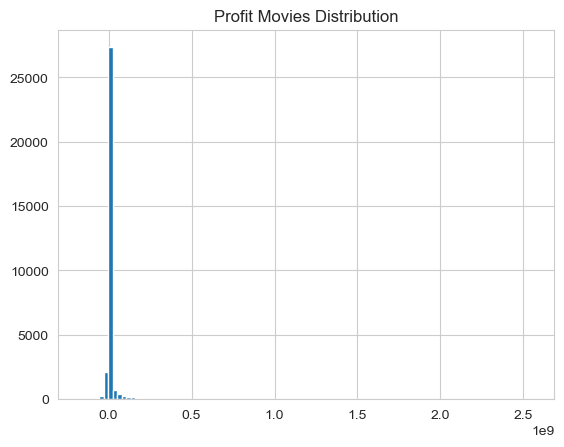

In [59]:
# Make a histogram about profit
data1['profit'].hist(bins=100)
plt.title("Profit Movies Distribution")
plt.show()

In [60]:
# Get description about profit column
data1['profit'].describe().astype(int)

count         31952
mean        9656514
std        61545781
min      -165710090
25%               0
50%               0
75%               0
max      2550965087
Name: profit, dtype: int64

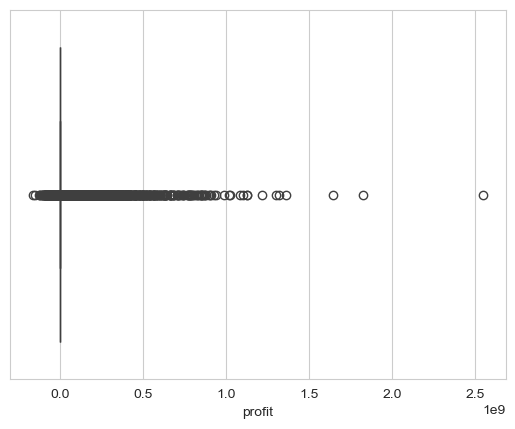

In [61]:
# Make a boxplot to see outliers in profit column
sns.boxplot(data=data1, x='profit')
plt.show()

As we see in the histogram, first and third quartile of the diagram is 0. So, this data isn't good data

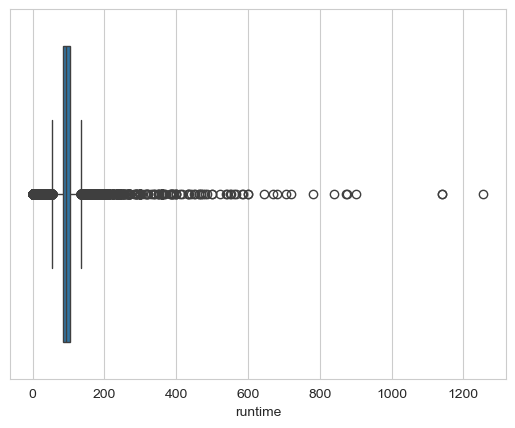

In [62]:
# Now, we see in runtime boxplot
sns.boxplot(data=data1, x = 'runtime')
plt.show()

### 2. Film Distribution

In [63]:
# We see any film which give profit
data1['profit'].quantile(0.9)

np.float64(7800000.0)

Based on our calculation, only 10% of the films which get profit. And remainder only return for investment.

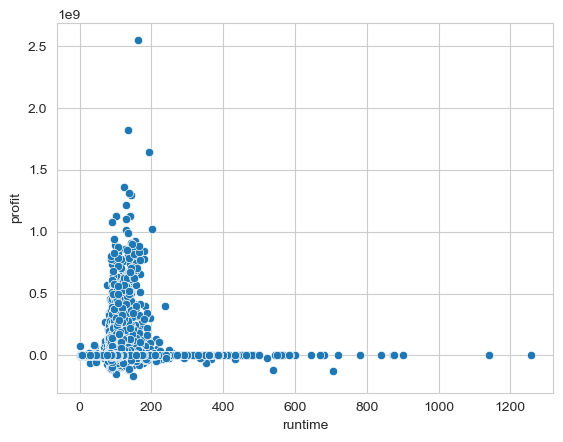

In [64]:
# Relationship of profit and runtime
sns.scatterplot(data = data1, x = 'runtime', y = 'profit')
plt.show()

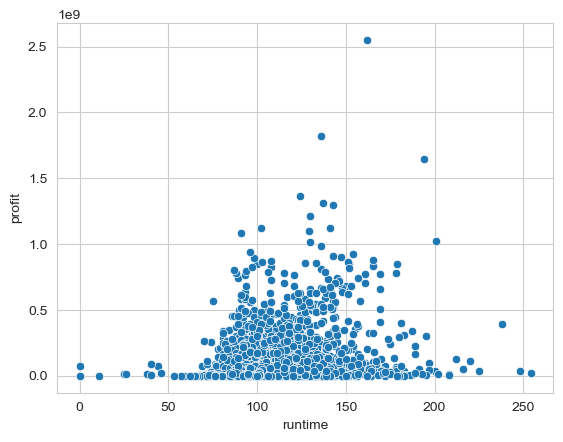

In [65]:
# Now, we filter any film which profit > 0
profit_mov = data1[data1['profit'] > 0]
sns.scatterplot(data = profit_mov, x = 'runtime', y = 'profit')
plt.show()

### 3. Relationship About Duration and Rating

In [66]:
rating1 = rating_data.groupby('movieId', as_index=False)['rating'].median()

In [67]:
rating1

,movieId,rating
0,1,4.0
1,2,3.0
2,3,3.0
3,4,3.0
4,5,3.0
...,...,...
9061,161944,5.0
9062,162376,4.5
9063,162542,5.0
9064,162672,3.0


<Axes: xlabel='rating', ylabel='Count'>

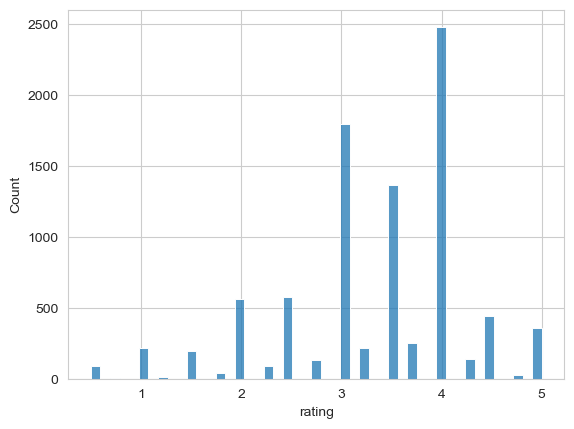

In [68]:
# Rating Distribution
sns.histplot(data = rating1, x = 'rating')

In [69]:
rating1['good_movies'] = rating1['rating'] >= 3

<Axes: ylabel='count'>

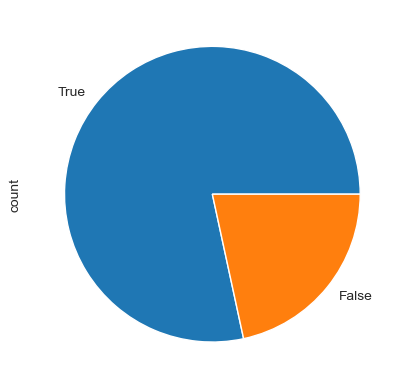

In [70]:
rating1['good_movies'].value_counts().plot(kind='pie')

### 4. Profit Distribution of the film

In [71]:
profit_mov.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4915 entries, 0 to 45406
Data columns (total 25 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   title                  4915 non-null   object        
 1   adult                  4915 non-null   bool          
 2   belongs_to_collection  1182 non-null   object        
 3   budget                 4915 non-null   int64         
 4   genres                 4915 non-null   object        
 5   homepage               1652 non-null   object        
 6   id                     4915 non-null   int64         
 7   imdb_id                4915 non-null   object        
 8   original_language      4915 non-null   object        
 9   original_title         4915 non-null   object        
 10  overview               4914 non-null   object        
 11  popularity             4915 non-null   float64       
 12  poster_path            4915 non-null   object        
 13  product

In [72]:
# Merge profitable moveies and rating
merge1 = profit_mov.merge(rating1, left_on='id', right_on='movieId', how='inner')
merge1

,title,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,video,vote_average,vote_count,profit,movieId,rating,good_movies
0,Heat,True,NaN,60000000,"[{'id': 28, 'name': 'Action'}, {'id': 80, 'nam...",NaN,949,tt0113277,en,Heat,"Obsessive master thief, Neil McCauley leads a ...",17.924927,/zMyfPUelumio3tiDKPffaUpsQTD.jpg,"[{'name': 'Regency Enterprises', 'id': 508}, {...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-15,187436818.0,170.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,A Los Angeles Crime Saga,False,7.7,1886.0,127436818.0,949,3.75,True
1,GoldenEye,True,"{'id': 645, 'name': 'James Bond Collection', '...",58000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 28, '...",http://www.mgm.com/view/movie/757/Goldeneye/,710,tt0113189,en,GoldenEye,James Bond must unmask the mysterious head of ...,14.686036,/5c0ovjT41KnYIHYuF4AWsTe3sKh.jpg,"[{'name': 'United Artists', 'id': 60}, {'name'...","[{'iso_3166_1': 'GB', 'name': 'United Kingdom'...",1995-11-16,352194034.0,130.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,No limits. No fears. No substitutes.,False,6.6,1194.0,294194034.0,710,1.50,False
2,Casino,True,NaN,52000000,"[{'id': 18, 'name': 'Drama'}, {'id': 80, 'name...",NaN,524,tt0112641,en,Casino,The life of the gambling paradise – Las Vegas ...,10.137389,/xo517ibXBDdYQY81j0WIG7BVcWq.jpg,"[{'name': 'Universal Pictures', 'id': 33}, {'n...","[{'iso_3166_1': 'FR', 'name': 'France'}, {'iso...",1995-11-22,116112375.0,178.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,No one stays at the top forever.,False,7.8,1343.0,64112375.0,524,3.50,True
3,Sense and Sensibility,True,NaN,16500000,"[{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...",NaN,4584,tt0114388,en,Sense and Sensibility,"Rich Mr. Dashwood dies, leaving his second wif...",10.673167,/lA9HTy84Bb6ZwNeyoZKobcMdpMc.jpg,"[{'name': 'Columbia Pictures Corporation', 'id...","[{'iso_3166_1': 'GB', 'name': 'United Kingdom'...",1995-12-13,135000000.0,136.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Lose your heart and come to your senses.,False,7.2,364.0,118500000.0,4584,5.00,True
4,Four Rooms,True,NaN,4000000,"[{'id': 80, 'name': 'Crime'}, {'id': 35, 'name...",NaN,5,tt0113101,en,Four Rooms,It's Ted the Bellhop's first night on the job....,9.026586,/eQs5hh9rxrk1m4xHsIz1w11Ngqb.jpg,"[{'name': 'Miramax Films', 'id': 14}, {'name':...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-09,4300000.0,98.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Twelve outrageous guests. Four scandalous requ...,False,6.5,539.0,300000.0,5,3.00,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
927,Without You I'm Nothing,True,NaN,0,"[{'id': 35, 'name': 'Comedy'}]",NaN,5302,tt0100946,en,Without You I'm Nothing,Sandra Bernhard stars in a studio version of h...,0.138263,/p4e3eQpu5ijpBE38EJz5hAd3CVD.jpg,[{'name': 'Management Company Entertainment Gr...,"[{'iso_3166_1': 'US', 'name': 'United States o...",1990-05-11,1218730.0,90.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,No Tagline,False,5.0,1.0,1218730.0,5302,3.50,True
928,Big Time,True,NaN,0,"[{'id': 99, 'name': 'Documentary'}, {'id': 18,...",NaN,44694,tt0094743,en,Big Time,Bringing his unique sense of humor to this biz...,0.000001,/bhq6dvbwPbebHT6xd8g7gie7spe.jpg,[],"[{'iso_3166_1': 'US', 'name': 'United States o...",1988-09-15,148426.0,87.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,"The concert was ""the best live performance of ...",False,5.8,5.0,148426.0,44694,3.50,True
929,Confessions of a Dangerous Mind,True,NaN,30000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 80, 'nam...",NaN,4912,tt0270288,en,Confessions of a Dangerous Mind,"Television made him famous, but his biggest hi...",7.645827,/o3Im9nPLAgtlw1j2LtpMebAotSe.jpg,

<Axes: xlabel='budget', ylabel='revenue'>

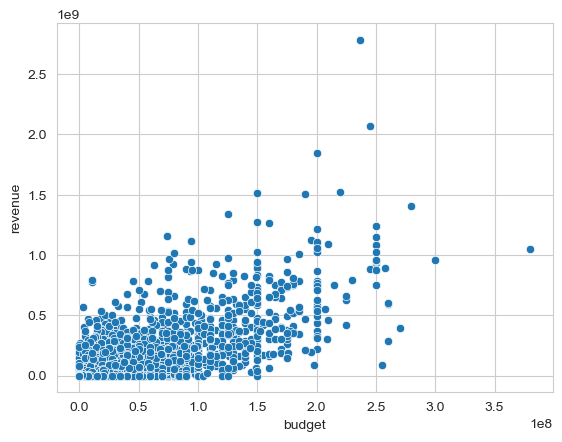

In [73]:
# Relationship between bugdet and revenue
sns.scatterplot(data = data1, x = 'budget', y = 'revenue')

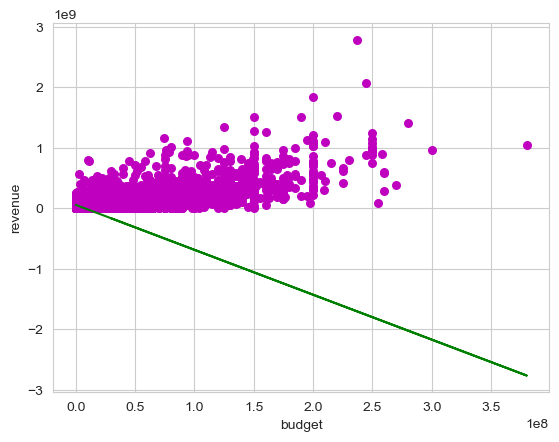

In [74]:
# Make linear regression about budget and revenue
def estimate_coef(x, y):
    n = np.size(x)

    # mean of x and y vector
    m_x = np.mean(x)
    m_y = np.mean(y)

    # calculating cross-deviation and deviation about x
    SS_xy = np.sum(y*x) - n*m_y*m_x
    SS_xx = np.sum(x*x) - n*m_x*m_x

    # calculating regression coefficients
    b_1 = SS_xy / SS_xx
    b_0 = m_y - b_1*m_x

    return (b_0, b_1)

def plot_regression_line(x, y, b):
    # plotting the actual points as scatter plot
    plt.scatter(x, y, color = "m",
    marker = "o", s = 30)

    # predicted response vector
    y_pred = b[0] + b[1]*x

    # plotting the regression line
    plt.plot(x, y_pred, color = "g")

    # putting labels
    plt.xlabel('budget')
    plt.ylabel('revenue')

p = data1['budget']
q = data1['revenue']

estimate_coef(p,q)
plot_regression_line(p,q,estimate_coef(p,q))

In [75]:
estimate_coef(p,q)

(np.float64(57314996.18231094), np.float64(-7.41514054819871))

### 5. Relationship About Profit and Rating

<Axes: xlabel='profit', ylabel='Count'>

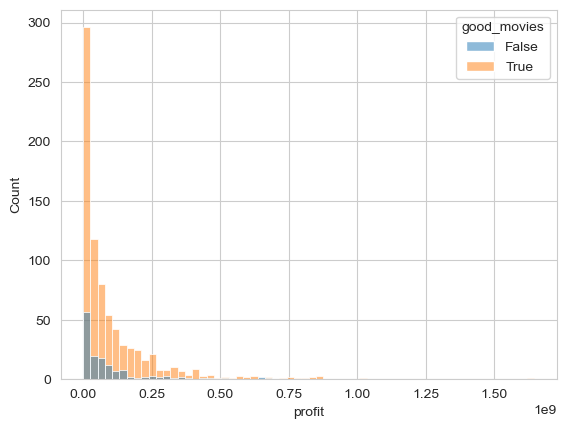

In [76]:
sns.histplot(data = merge1,
             x = 'profit',
             hue='good_movies')

<Axes: xlabel='runtime', ylabel='profit'>

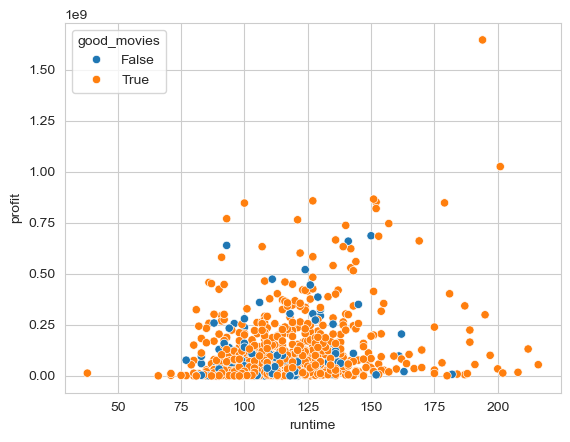

In [77]:
sns.scatterplot(data=merge1,
                x = 'runtime',
                y = 'profit',
                hue = 'good_movies')

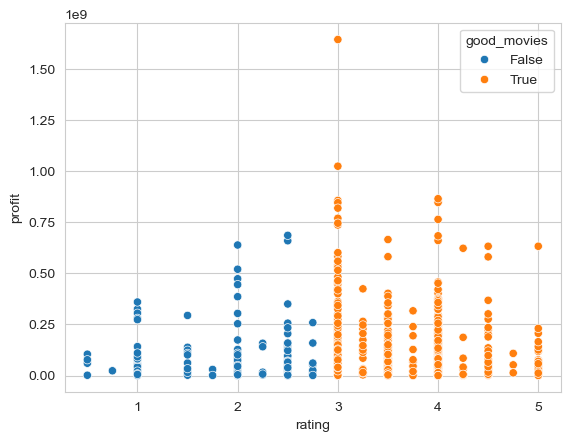

In [78]:
sns.scatterplot(data = merge1,
                x = 'rating',
                y = 'profit',
                hue = 'good_movies')
plt.show()

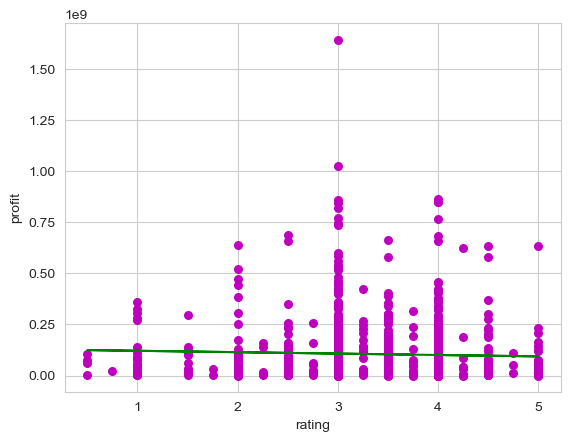

In [79]:
# Make linear regression about profit and rating
def estimate_coef(x, y):
    n = np.size(x)

    # mean of x and y vector
    m_x = np.mean(x)
    m_y = np.mean(y)

    # calculating cross-deviation and deviation about x
    SS_xy = np.sum(y*x) - n*m_y*m_x
    SS_xx = np.sum(x*x) - n*m_x*m_x

    # calculating regression coefficients
    b_1 = SS_xy / SS_xx
    b_0 = m_y - b_1*m_x

    return (b_0, b_1)

def plot_regression_line(x, y, b):
    # plotting the actual points as scatter plot
    plt.scatter(x, y, color = "m",
    marker = "o", s = 30)

    # predicted response vector
    y_pred = b[0] + b[1]*x

    # plotting the regression line
    plt.plot(x, y_pred, color = "g")

    # putting labels
    plt.xlabel('rating')
    plt.ylabel('profit')

p = merge1['rating']
q = merge1['profit']

estimate_coef(p,q)
plot_regression_line(p,q,estimate_coef(p,q))

In [80]:
estimate_coef(p,q)

(np.float64(127939036.04903647), np.float64(-6857069.7960306825))

# Machine Learning Workflow

Select all numeric types data

In [81]:
merge1.select_dtypes(include='number')

,budget,id,popularity,revenue,runtime,vote_average,vote_count,profit,movieId,rating
0,60000000,949,17.924927,187436818.0,170.0,7.7,1886.0,127436818.0,949,3.75
1,58000000,710,14.686036,352194034.0,130.0,6.6,1194.0,294194034.0,710,1.50
2,52000000,524,10.137389,116112375.0,178.0,7.8,1343.0,64112375.0,524,3.50
3,16500000,4584,10.673167,135000000.0,136.0,7.2,364.0,118500000.0,4584,5.00
4,4000000,5,9.026586,4300000.0,98.0,6.5,539.0,300000.0,5,3.00
...,...,...,...,...,...,...,...,...,...,...
927,0,5302,0.138263,1218730.0,90.0,5.0,1.0,1218730.0,5302,3.50
928,0,44694,0.000001,148426.0,87.0,5.8,5.0,148426.0,44694,3.50
929,30000000,4912,7.645827,33013805.0,113.0,6.6,281.0,3013805.0,4912,3.50
930,0,79163,0.003568,2203.0,81.0,0.0,0.0,2203.0,79163,4.00


In behaviour, id and movieid is not a number, bus identifier. So, we want to describe id and movieid as object type.

In this example, we state the target is rating. So, we set target as rating in integer type.

In [82]:
# Set target in ML workflow is rating
def select_column(df: pd.DataFrame, features: list, target : list='rating'):
    x = df[features]
    y = (df[target] >= 3).astype('int')
    
    return x, y


In [83]:
from sklearn.model_selection import train_test_split

In [84]:
features = ['budget', 'popularity', 'runtime', 'vote_average']
x, y = select_column(merge1, features=features)

In [85]:
y

0      1
1      0
2      1
3      1
4      1
      ..
927    1
928    1
929    1
930    1
931    1
Name: rating, Length: 932, dtype: int64

In [86]:
# Now, we split the data in training and testing data set.
# Note that training dataset must bigger than testing dataset
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size= 0.3, random_state=42)

In [87]:
x_train

,budget,popularity,runtime,vote_average
133,1200000,12.220340,99.0,8.1
507,0,12.171218,98.0,6.4
843,85000000,6.645799,115.0,5.8
599,30000000,14.015739,97.0,5.8
497,25000000,7.637345,98.0,6.4
...,...,...,...,...
106,1500000,11.954806,119.0,7.8
270,11000000,8.489499,197.0,7.4
860,19000000,6.148516,113.0,7.2
435,2000000,11.189831,95.0,7.3


In [88]:
x_test

,budget,popularity,runtime,vote_average
829,15000000,12.884191,100.0,6.5
70,40000000,11.232970,108.0,4.9
631,2650000,4.471515,147.0,7.0
506,24000000,11.666172,91.0,6.4
703,2600000,2.203949,105.0,7.6
...,...,...,...,...
587,8000000,11.040186,101.0,7.1
428,6500000,9.356264,142.0,6.5
302,20000000,18.157166,119.0,8.2
411,2000000,9.333533,134.0,7.6


In [89]:
# Checking if our split is correct
280/(280+652)

0.30042918454935624

Now, we want to scaling the data to ensure data is clean and no bias. 
In this section, we use minmaxscaler.

In [90]:
from sklearn.preprocessing import MinMaxScaler

In [91]:
minmax = MinMaxScaler()

In [92]:
minmax.fit(x_train)

MinMaxScaler()

In [93]:
def scaling(df, scaler):
    scaled_array = scaler.transform(df)
    scaled_df = pd.DataFrame(scaled_array, columns=minmax.get_feature_names_out())
    
    return scaled_df

In [94]:
x_train_scaled = scaling(x_train, minmax)
x_test_scaled = scaling(x_test, minmax)

In [95]:
scaling(x_train, minmax)

,budget,popularity,runtime,vote_average
0,0.004000,0.086700,0.342697,0.914894
1,0.000000,0.086351,0.337079,0.553191
2,0.283333,0.047150,0.432584,0.425532
3,0.100000,0.099437,0.331461,0.425532
4,0.083333,0.054185,0.337079,0.553191
...,...,...,...,...
647,0.005000,0.084816,0.455056,0.851064
648,0.036667,0.060230,0.893258,0.765957
649,0.063333,0.043622,0.421348,0.723404
650,0.006667,0.079389,0.320225,0.744681


In [96]:
scaling(x_test, minmax)

,budget,popularity,runtime,vote_average
0,0.050000,0.091409,0.348315,0.574468
1,0.133333,0.079695,0.393258,0.234043
2,0.008833,0.031724,0.612360,0.680851
3,0.080000,0.082768,0.297753,0.553191
4,0.008667,0.015636,0.376404,0.808511
...,...,...,...,...
275,0.026667,0.078327,0.353933,0.702128
276,0.021667,0.066380,0.584270,0.574468
277,0.066667,0.128820,0.455056,0.936170
278,0.006667,0.066219,0.539326,0.808511


In [97]:
x_test_scaled.iloc[0]

budget          0.050000
popularity      0.091409
runtime         0.348315
vote_average    0.574468
Name: 0, dtype: float64

# Supervised Learning

In this section, we use scaling to avoid bias and increase accuracy in our KNN calculations.

In [98]:
from sklearn.neighbors import KNeighborsClassifier

In [99]:
## Initiate the function
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(x_train_scaled, y_train)

KNeighborsClassifier()

In [100]:
# Check if our model is good
knn.fit(x_train_scaled, y_train)

KNeighborsClassifier()

In [101]:
y_train_pred = knn.predict(x_train_scaled)

In [102]:
y_train_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [103]:
y_test_pred = knn.predict(x_test_scaled)

In [104]:
y_test_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [105]:
pd.crosstab(y_test, y_test_pred)

col_0,0,1
rating,,
0,0,42
1,5,233


In [106]:
from sklearn.tree import DecisionTreeClassifier

In [107]:
dt = DecisionTreeClassifier()

In [108]:
dt.fit(x_train_scaled, y_train)

DecisionTreeClassifier()

In [109]:
y_train_pred_dt = dt.predict(x_train_scaled)

In [110]:
y_test_pred_dt = dt.predict(x_test_scaled)

In [111]:
pd.crosstab(y_test, y_test_pred_dt)

col_0,0,1
rating,,
0,7,35
1,41,197


# Model Evaluation

### Classification Method

In [112]:
from sklearn.metrics import confusion_matrix, classification_report

#### Get the confusion matrix

In [113]:
confusion_matrix(y_test, y_test_pred_dt)

array([[  7,  35],
       [ 41, 197]])

#### Get classificatoin report

In [114]:
print(classification_report(y_test, y_test_pred_dt))

              precision    recall  f1-score   support

           0       0.15      0.17      0.16        42
           1       0.85      0.83      0.84       238

    accuracy                           0.73       280
   macro avg       0.50      0.50      0.50       280
weighted avg       0.74      0.73      0.74       280



In [ ]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        42
           1       0.85      0.98      0.91       238

    accuracy                           0.83       280
   macro avg       0.42      0.49      0.45       280
weighted avg       0.72      0.83      0.77       280



### Get Precision, Accuracy, Recall score, and R1 score

In [116]:
from sklearn.metrics import recall_score, precision_score, accuracy_score, f1_score

In [118]:
print("Recall: ", recall_score(y_test, y_test_pred))
print("Precision: ", precision_score(y_test, y_test_pred))
print("Accuracy: ", accuracy_score(y_test, y_test_pred))
print("f1_score: ", f1_score(y_test, y_test_pred))

Recall:  0.9789915966386554
Precision:  0.8472727272727273
Accuracy:  0.8321428571428572
f1_score:  0.9083820662768031
